Importando as bibliotecas


In [8]:
# import seaborn as sns
# import sklearn as sk
import pandas as pd
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as plt

# from numpy.core.defchararray import join
from random import randrange


Função K-means


In [9]:
def my_centers(samples, number_centers):
    """Using the Forgy method"""
    centers = []
    points_used = []
    sample_size = len(samples)
    i = 0
    while i < number_centers:
        new_center = randrange(sample_size)
        # check if the random point hasn't been chosen
        if new_center not in points_used:
            points_used.append(new_center)
            centers.append(samples[new_center])
            i += 1
    return centers


def distance(sample, center):
    diff = sample - center
    dist = np.linalg.norm(diff)
    return dist


# returns which center has the minimal distance to the point and the minimal distance found
def find_minimal_distance(point, centers):
    min_pos = 0
    min_dist = distance(point, centers[0])

    for i in range(1, len(centers)):
        new_dist = distance(point, centers[i])
        if new_dist < min_dist:
            min_dist = new_dist
            min_pos = i
    return min_pos, min_dist


def my_kmeans(samples, number_centers, max_iteration: int = 1000):
    # adquire os centros dos clusters
    centers = my_centers(samples, number_centers)
    # inicia a separacao dos pontos em clusters
    number_samples = len(samples)
    over = False
    iterations = 0
    while not over:
        cluster_sum = [0] * number_centers
        cluster_number_points = [0] * number_centers

        # encontra a distancia minima e soma a distancia no respectivo cluster
        for i in range(number_samples):
            min = find_minimal_distance(samples[i], centers)
            cluster_sum[min[0]] += samples[i]
            cluster_number_points[min[0]] += 1

        # calcula a media de cada cluster e modifica os centros
        prev_center = centers.copy()
        for i in range(number_centers):
            if(cluster_number_points[i] != 0):
                centers[i] = np.array(cluster_sum[i] / cluster_number_points[i])

        # calcula a diferenca dos centros com a interacao anterior
        diff_norm = 0
        for i in range(number_centers):
            diff_v = centers[i] - prev_center[i]
            diff_norm += np.linalg.norm(diff_v)

        # verifica se os centros foram muito alterados, senao encerra o algoritmo
        if diff_norm < 0.001:
            over = True
            break
        
        # verifica se o numero maximo de iteracoes foi alcancado, senao encerra o algoritmo
        iterations += 1
        if iterations > max_iteration:
            over = True
            break
    return centers


Recebendo os dados do dataset


In [10]:
def fetch_dataset(string):
    arquivo = pd.read_csv(string, header=0)
    linhas = len(arquivo)
    colunas = len(arquivo.columns)
    array_linha = np.zeros(colunas)
    array_final = np.array([array_linha] * linhas)
    j = 0
    i = 0

    while i < linhas:
        array_linha[j] = arquivo.iloc[i, j]
        j += 1
        if j == 7:
            array_final[i] = array_linha
            j = 0
            i += 1

    return array_final


Calculo elbow


In [11]:
def k_elbow(amostra, centros):
    # inicializacao de variaveis
    array_valores_finais = [0] * (centros - 2)
    k = 2  # numero de centros

    # laço de repetição de k centros
    while k < centros:
        centroides = my_kmeans(amostra, k)
        i = 0
        soma_quadrado_distancia = 0
        # laço de repetição para calcular a soma do quadrado das distancias
        while i < len(amostra):
            array_intermediario = find_minimal_distance(amostra[i], centroides)
            soma_quadrado_distancia += array_intermediario[1] ** 2
            i += 1
        array_valores_finais[k - 2] = soma_quadrado_distancia
        k += 1

    # variaveis para plotar o grafico
    x = np.zeros([centros - 2])
    h = 0
    while h < centros - 2:
        x[h] = h + 2
        h += 1

    # Plotting
    plt.title("Gráfico com os resultados finais")
    plt.xlabel("Número de centros")
    plt.ylabel("Soma quadrada das distâncias")
    plt.plot(x, array_valores_finais)
    plt.show()


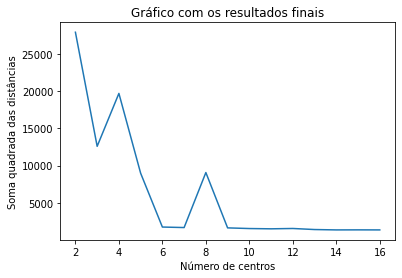

In [12]:
# executando o programa
file = "https://raw.githubusercontent.com/G-Nozawa/K-Means-Elbow-method/main/dados/dados_parte2.csv"
data = fetch_dataset(file)
# print(array_final)
k_elbow(data, 17)


# PCA

In [13]:
def mean(data: np.ndarray) -> np.ndarray:
    """Calculates the mean of a numpy.ndarray."""
    acc = [0] * len(data[0])
    for i in data:
        acc += i
    return np.array(acc) / len(data)


def demean(data: np.ndarray) -> np.ndarray:
    """Subtracts the mean of a numpy.ndarray from each element."""
    return data - mean(data)


def covariance(data: np.ndarray) -> np.ndarray:
    """Calculates the covariance of a numpy.ndarray."""
    return (1 / (len(data) - 1)) * (data * data.T)


def order_vectors(values: np.array, vectors: np.matrix):
    """Orders the values and vectors based on the values."""
    values = np.sqrt(values.T * values) # magnitude of each vector
    values_order = np.argsort(values)[::-1]  # indexes on reverse order
    return values[values_order], vectors[values_order] # return the sorted values and vectors

In [14]:
def PCA(data):
    demeaned = demean(data)
    cov_matrix = covariance(demeaned)
    eig_val, eig_vec = np.linalg.eig(cov_matrix)
    eig_val, eig_vec = order_vectors(eig_val, eig_vec)
    return eig_val, eig_vec
